In [122]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
import csv
import PIL

from glob import glob
from PIL import Image
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.image import pad_to_bounding_box
from tensorflow.image import central_crop
from tensorflow.image import resize

In [156]:
path = './seg_hair/'

train_images = []
train_labels = []

train_labels = ["hair1", "hair2", "hair3", "hair4", "hair5", "hair6", "hair7", "hair8", "hair9", "hair10"]
train_labels = np.array(train_labels)

for label in train_labels:
    img = path + "/" + label + ".jpg"
    an_img = PIL.Image.open(img)
    an_img = an_img.resize((32, 32))
    img_array = np.array(an_img)
    train_images.append(img_array)

# for img in glob
# for filename in glob(path + "*"):
#     for img in glob(filename + "/*.jpg"):
#         an_img = PIL.Image.open(img)
#         img_array = np.array(an_img)
#         train_images.append(img_array)

train_images = np.array(train_images)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
train_labels = train_labels.reshape(-1,1)

print(train_images.shape)
print(train_labels.shape)

(10, 32, 32, 3)
(10, 1)


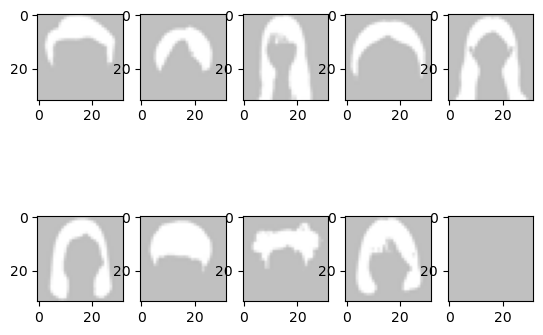

In [151]:
%matplotlib inline

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_images[i])
plt.show()

In [152]:
label_num = [0,1,2,3,4,5,6,7,8,9]
label_name = le.inverse_transform(label_num)

for i in range(10):
    print(label_num[i], label_name[i])

0 hair1
1 hair10
2 hair2
3 hair3
4 hair4
5 hair5
6 hair6
7 hair7
8 hair8
9 hair9


In [153]:
train_x = train_images / 255.0
# train_labels = train_labels.reshape(-1, 10)

In [154]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation="relu", padding="same", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(len(train_labels), activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(train_x, train_labels)

ValueError: in user code:

    File "C:\Users\jisoo\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\jisoo\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\jisoo\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\jisoo\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\jisoo\anaconda3\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\jisoo\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\jisoo\anaconda3\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\jisoo\anaconda3\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\jisoo\anaconda3\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\jisoo\anaconda3\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [20]:
# from sklearn.preprocessing import LabelEncoder

# categories = ['hair1', 'hair2', 'hair3', 'hair4', 'hair5', 'hair6', 'hair7', 'hair8', 'hair9', 'hair10']

# encoder = LabelEncoder()
# encoder.fit(categories)
# class_name = encoder.transform(categories)

# class_name

In [131]:
# data_dir = "./seg_hair"
# categories = ['hair1', 'hair2', 'hair3', 'hair4', 'hair5', 'hair6', 'hair7', 'hair8', 'hair9', 'hair10']
# nb_classes = len(categories)

# image_w = 28
# image_h = 28

# pixels = image_h * image_w * 3

# X = []
# Y = []

# # OneHotEncoding(Label)
# for idx, category in enumerate(categories):
#     label = [0 for i in range(nb_classes)]
#     label[idx] = 1
#     Y.append(label)
    
    
#     # train image resize & convert to RGB
#     files = data_dir + "/" + category + '.jpg'
    
#     img = Image.open(files)
#     img = img.convert("RGB")
#     img = img.resize((image_w, image_h))
#     data = np.asarray(img)
    
#     X.append(data)

# X = np.array(X)
# Y = np.array(Y)

In [109]:
# model = Sequential()

# model.add(Conv2D(32, (3, 3), padding='same', input_shape=X.shape[1:], activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3, 3), padding='same', input_shape=X.shape[1:], activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())

# model.add(Dense(256, activation='relu'))

# model.add(Dense(nb_classes, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [110]:
# model.fit(X, Y, epochs=100, verbose=0)

In [130]:
# test_f = 'imgtestseg.jpg'

# test_x = []

# pixels = image_h * image_w * 3
# test_img = Image.open(test_f)
# test_img = test_img.convert("RGB")
# test_img = test_img.resize((image_w, image_h))
# test_d = data = np.asarray(test_img)

# test_x.append(test_d)

# pred = model.predict(test_x)
